<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2008%EC%9D%BC/11%EC%9B%94_8%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as  pd
import requests

# 페이지 번호를 제외한 주소 저장
new_url = 'https://finance.naver.com/item/sise_day.naver?code=252670&page='

# 헤더 정보 설정하기
my_headers = {'user-agent': 'Mozilla/5.0'}

# 데이터를 축적할 데이터프레임 생성
all_tables_year = pd.DataFrame()

# 페이지 번호 증가용 반복문
for page_number in range(1, 100):
    # 페이지 번호 추가한 주소 완성
    full_url = new_url + str(page_number)
    # 주소 확인하기
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    # HTTP 요청 전송 후 응답 받아오기
    page = requests.get(full_url, headers=my_headers)
    # 테이블 추출
    table = pd.read_html(page.text)[0]
    # 수행할 내용 확인
    print(f'전체 {len(all_tables_year.index)} 줄에 {len(table.index)} 줄 추가')
    # 데이터 축적용 데이터프레임에 테이블 추가
    all_tables_year = pd.concat([all_tables_year, table])

SyntaxError: ignored

In [ ]:
#판다스 문제풀이
# nfl.csv 파일에는 내셔널 픗볼리그의 선수 목록이 있다.
# 이름, 팀, 포지션, 생일과 연봉
# (name,  Team,  Position, BirthDay,   Salary)
# nfl.csv 파일을 가져오려면 어떻게 해야할까요?
# Birthday 열의 값을 날짜/시간으로 변환하는 효과적인 방법은 무엇일까요?
nfl = pd.read_csv("nfl.csv", parse_dates = ["Birthday"])

# 선수의 이름을 DataFrame의 인덱스로 지정하는 두 가지 방법은 무엇인가요?
nfl = nfl.set_index("Name")
nfl = pd.read_csv("nfl.csv", index_col = "Name", parse_dates = ["Birthday"])

# 이 데이터셋에서 팀 당 선수가 몇 명인지 계산하는 방법은 무엇인가요?
nfl.Team.value_counts().head()
nfl["Team"].value_counts().head()

# 가장 높은 연봉을 받는 5명의 선수는 누구인가요?
nfl.sort_values("Salary", ascending = False).head()

# 데이터셋에서 먼저 팀을 알파벳 순서로 정렬한 다음 연봉을 내림차순으로 정렬해보세요.
nfl.sort_values(by = ["Team", "Salary"],ascending = [True, False])

# New York Jets 팀에서 가장 나이가 많은 선수는 누구이며 그의 생일 언제인가요?
nfl = nfl.reset_index().set_index(keys = "Team")
nfl.head(3)
nfl.loc["New York Jets"].head()
nfl.loc["New York Jets"].sort_values("Birthday").head(1)

#기계 학습 (주식 시세)

In [ ]:
# 지난주 웹 크롤링 부분 가져오기
import pandas as pd
import requests

# 페이지 번호 제외한 주소 저장
url = 'https://finance.naver.com/item/sise_day.naver?code=086520&page='

# 헤더 정보 설정하기
my_headers = {'user-agent':'Mozilla/5.0'}

# 데이터 축적할 데이터프레임 생성
all_tables = pd.DataFrame()

for page_number in range(1, 100):
    full_url = url + str(page_number)
    page = requests.get(full_url, headers=my_headers)
    table = pd.read_html(page.text)[0]
    all_tables = pd.concat([all_tables, table])

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.11.08,815000.0,44000.0,821000.0,843000.0,791000.0,330620.0
2,2023.11.07,859000.0,31000.0,870000.0,928000.0,795000.0,2345414.0
3,2023.11.06,828000.0,191000.0,732000.0,828000.0,712000.0,1153091.0
4,2023.11.03,637000.0,12000.0,666000.0,680000.0,631000.0,659109.0
...,...,...,...,...,...,...,...
10,2019.11.11,20400.0,400.0,20700.0,20900.0,20150.0,119114.0
11,2019.11.08,20800.0,350.0,20750.0,21200.0,20600.0,160161.0
12,2019.11.07,20450.0,700.0,21150.0,21250.0,20300.0,242041.0
13,2019.11.06,21150.0,50.0,21200.0,21400.0,20950.0,205231.0


In [ ]:
# 결손치 제거
all_tables.dropna(inplace=True)

# 열 이름 영문으로 변경
all_tables.rename(columns={'날짜':'ds'}, inplace=True)

# 중위값 열 추가
all_tables['y'] = all_tables['고가'] - ((all_tables['고가'] - all_tables['저가']) / 2)

all_tables

,ds,종가,전일비,시가,고가,저가,거래량,y
1,2023.11.08,815000.0,44000.0,821000.0,843000.0,791000.0,330620.0,817000.0
2,2023.11.07,859000.0,31000.0,870000.0,928000.0,795000.0,2345414.0,861500.0
3,2023.11.06,828000.0,191000.0,732000.0,828000.0,712000.0,1153091.0,770000.0
4,2023.11.03,637000.0,12000.0,666000.0,680000.0,631000.0,659109.0,655500.0
5,2023.11.02,649000.0,52000.0,616000.0,649000.0,607000.0,539406.0,628000.0
...,...,...,...,...,...,...,...,...
9,2019.11.12,20450.0,50.0,20400.0,20550.0,20200.0,84890.0,20375.0
10,2019.11.11,20400.0,400.0,20700.0,20900.0,20150.0,119114.0,20525.0
11,2019.11.08,20800.0,350.0,20750.0,21200.0,20600.0,160161.0,20900.0
12,2019.11.07,20450.0,700.0,21150.0,21250.0,20300.0,242041.0,20775.0


In [ ]:
# 학습 대상 데이터프레임 생성
df = pd.DataFrame()

# 필요한 열만 추출하여 저장
df = all_tables[['ds','y']]

df

,ds,y
1,2023.11.08,817000.0
2,2023.11.07,861500.0
3,2023.11.06,770000.0
4,2023.11.03,655500.0
5,2023.11.02,628000.0
...,...,...
9,2019.11.12,20375.0
10,2019.11.11,20525.0
11,2019.11.08,20900.0
12,2019.11.07,20775.0


In [ ]:
from prophet import Prophet
# 프로핏 모델 객체 만들기
m = Prophet()

# 데이터프레임 학습하기
m.fit(df)  # fit() --> 학습할때 많이 쓰임

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8daxmu2/av522cfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8daxmu2/_3nnmzwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82316', 'data', 'file=/tmp/tmpn8daxmu2/av522cfv.json', 'init=/tmp/tmpn8daxmu2/_3nnmzwg.json', 'output', 'file=/tmp/tmpn8daxmu2/prophet_modelhfd9x2oh/prophet_model-20231108010959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 예측 데이터프레임 준비하기
future = m.make_future_dataframe(periods=1000)  # 1000개의 예측대상 frame 만들기

# 끝부분 확인하기
future.tail()

,ds
1985,2026-07-31
1986,2026-08-01
1987,2026-08-02
1988,2026-08-03
1989,2026-08-04


In [ ]:
# 예측하기
forecast = m.predict(future)  # predict() --> 예측하기

# 예측 결과 끝부분 확인하기
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()  # yhat -> 결과값쪽에서 많이 사용
# yhat, yhat_lower, yhat_upper --> 자동 생성된 예측값들

,ds,yhat,yhat_lower,yhat_upper
1985,2026-07-31,4.060558e+06,3.443642e+06,4.676368e+06
1986,2026-08-01,4.057254e+06,3.449227e+06,4.663633e+06
1987,2026-08-02,4.058903e+06,3.476862e+06,4.676391e+06
1988,2026-08-03,4.066653e+06,3.451007e+06,4.674213e+06
1989,2026-08-04,4.069375e+06,3.450891e+06,4.676446e+06


In [ ]:
# 2차 예측을 위한 프로핏 객체 만들기
m2 = Prophet()

# 2021년 1월 1일 이후 데이터만 준비
df2 = df[df['ds'] > '2021-01-01']

# 데이터 끝 부분 확인하기
df2.tail()

,ds,y
13,2021.01.08,57850.0
1,2021.01.07,54550.0
2,2021.01.06,52250.0
3,2021.01.05,52450.0
4,2021.01.04,51150.0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8daxmu2/aj44kq8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8daxmu2/bkam84_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76037', 'data', 'file=/tmp/tmpn8daxmu2/aj44kq8k.json', 'init=/tmp/tmpn8daxmu2/bkam84_u.json', 'output', 'file=/tmp/tmpn8daxmu2/prophet_modelm4mo6elz/prophet_model-20231108012445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:24:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:24:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


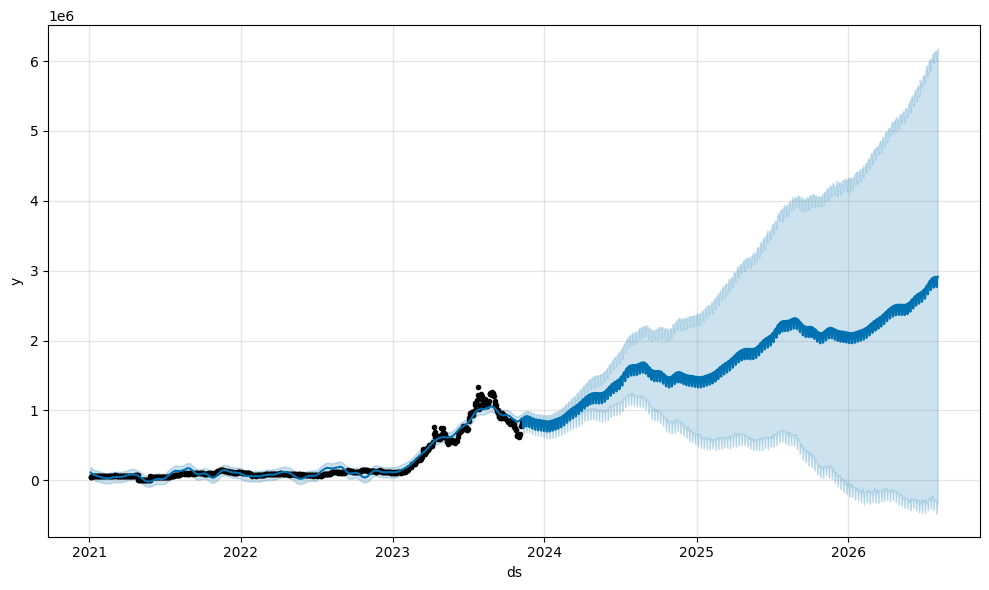

In [ ]:
# 데이터 학습하기
m2.fit(df2)

# 예측 데이터프레임 만들기
future2 = m2.make_future_dataframe(periods=1000)

# 예측하기
forecast2 = m2.predict(future2)

# 예측 결과 끝부분 확인하기
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# 시각화하기
fig3 = m2.plot(forecast2)

In [ ]:
# plot 모듈 탑재
from prophet.plot import plot_plotly, plot_components_plotly

# 대화형 예측 그래프 그리기
plot_plotly(m2, forecast2)

## 미니 프로젝트(covid)

In [ ]:
import pandas as pd
from prophet import Prophet

data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/owid-covid-data.csv')
data

data.rename(columns={'date':'ds','total_cases':'y'},inplace=True)
want = data[data.location=='South Korea']

In [ ]:
df = pd.DataFrame()
df = want[['ds', 'y']]
df

,ds,y
160818,2020-01-22,1.0
160819,2020-01-23,1.0
160820,2020-01-24,2.0
160821,2020-01-25,2.0
160822,2020-01-26,3.0
...,...,...
161681,2022-06-03,18153851.0
161682,2022-06-04,18163686.0
161683,2022-06-05,18168708.0
161684,2022-06-06,18174880.0


In [ ]:
# 프로핏 모델 객체 만들기
m = Prophet()

# 데이터프레임 학습하기
m.fit(df)

# 예측 데이터프레임 준비하기
future = m.make_future_dataframe(periods=1000)  # 1000개의 예측대상 frame 만들기

# 끝부분 확인하기
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8daxmu2/_jkwk9fa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8daxmu2/94mujfe2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58334', 'data', 'file=/tmp/tmpn8daxmu2/_jkwk9fa.json', 'init=/tmp/tmpn8daxmu2/94mujfe2.json', 'output', 'file=/tmp/tmpn8daxmu2/prophet_modelbjz88xjs/prophet_model-20231108021408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:14:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:14:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
1863,2025-02-27
1864,2025-02-28
1865,2025-03-01
1866,2025-03-02
1867,2025-03-03


In [ ]:
# 예측하기
forecast = m.predict(future)  # predict() --> 예측하기

# 예측 결과 끝부분 확인하기
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# 시각화
plot_plotly(m2, forecast2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8daxmu2/pvosb7zf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8daxmu2/szy6sn0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58160', 'data', 'file=/tmp/tmpn8daxmu2/pvosb7zf.json', 'init=/tmp/tmpn8daxmu2/szy6sn0t.json', 'output', 'file=/tmp/tmpn8daxmu2/prophet_modelddw_8373/prophet_model-20231108021639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:16:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:16:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


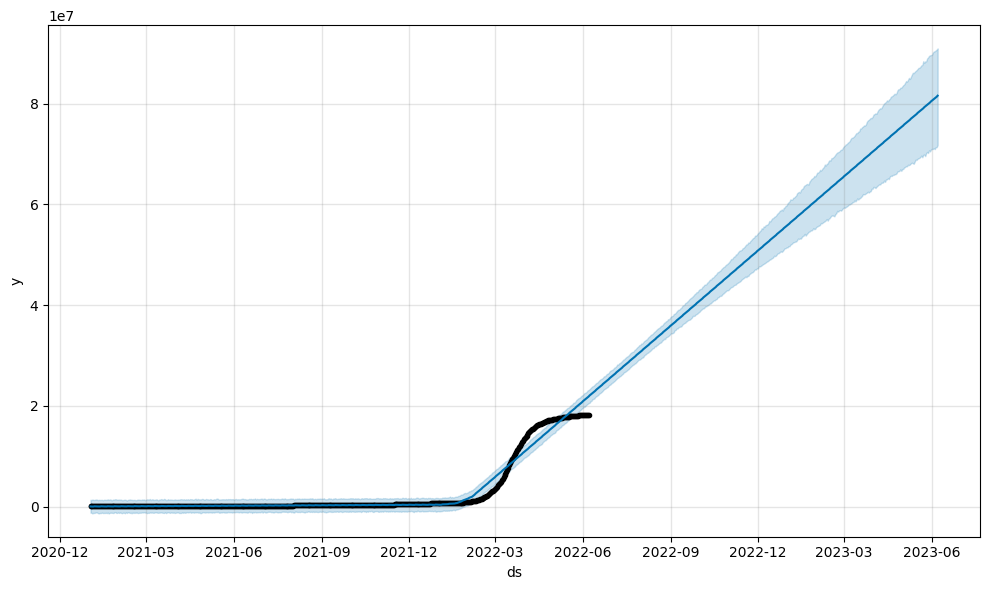

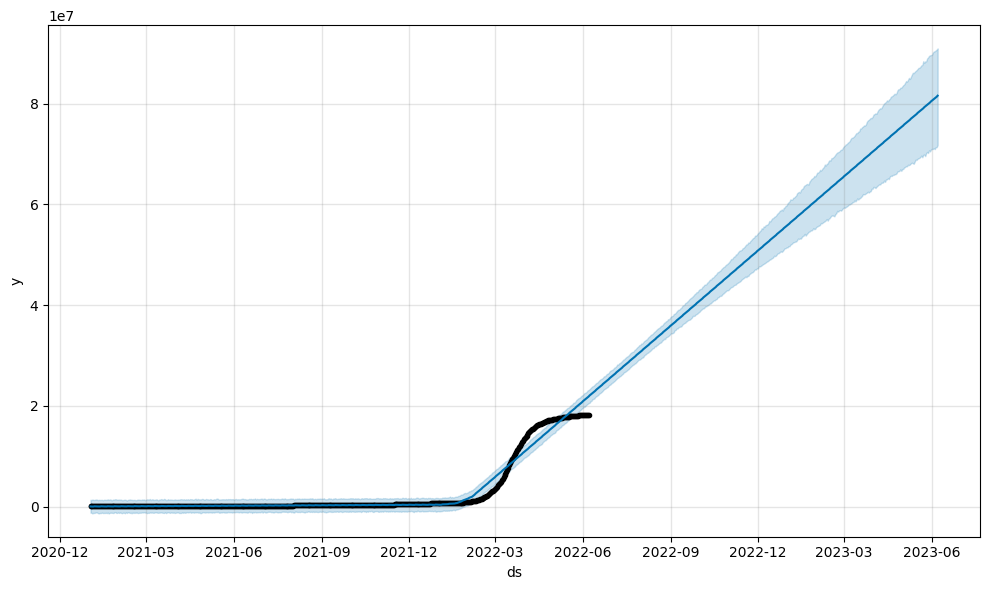

In [ ]:
# 2차 예측을 위한 프로핏 객체 만들기
m2 = Prophet()

# 2021년 1월 1일 이후 데이터만 준비
df2 = df[df['ds'] > '2021-01-01']

# 데이터 학습하기
m2.fit(df2)

# 예측 데이터프레임 만들기
future2 = m2.make_future_dataframe(periods=365)

# 예측하기
forecast2 = m2.predict(future2)

# plot 모듈 탑재
from prophet.plot import plot_plotly, plot_components_plotly

# 대화형 예측 그래프 그리기
plot_plotly(m2, forecast2)

# 연관 규칙 분석

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/survey_results_public.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [ ]:
# 개발자 타입 열 확인
data['DevType']

# 문자열을 리스트로 변환
dev_type = data['DevType'].str.split(';')
dev_type

0                                      [Developer, mobile]
1                                                      NaN
2                                                      NaN
3                                   [Developer, front-end]
4        [Developer, desktop or enterprise applications...
                               ...                        
83434                                [Developer, back-end]
83435                              [Developer, full-stack]
83436    [Data scientist or machine learning specialist...
83437                                [Developer, back-end]
83438    [Developer, front-end, Developer, full-stack, ...
Name: DevType, Length: 83439, dtype: object

In [ ]:
# 결손치 제거
dev_type.dropna(inplace=True)
dev_type.isnull().sum()
dev_type

0                                      [Developer, mobile]
3                                   [Developer, front-end]
4        [Developer, desktop or enterprise applications...
8                                   [Developer, front-end]
9          [Data scientist or machine learning specialist]
                               ...                        
83434                                [Developer, back-end]
83435                              [Developer, full-stack]
83436    [Data scientist or machine learning specialist...
83437                                [Developer, back-end]
83438    [Developer, front-end, Developer, full-stack, ...
Name: DevType, Length: 66484, dtype: object

In [ ]:
# 리스트 항목 각 열로 나누기
exploded_dev_type = dev_type.explode()
exploded_dev_type

# 유일한 값 확인
exploded_dev_type.unique()

array(['Developer, mobile', 'Developer, front-end',
       'Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Engineer, data',
       'Other (please specify):',
       'Data scientist or machine learning specialist',
       'Developer, back-end', 'Academic researcher',
       'Database administrator', 'Scientist', 'Student',
       'Developer, QA or test', 'Developer, game or graphics',
       'Developer, embedded applications or devices', 'DevOps specialist',
       'Data or business analyst', 'Designer', 'Engineering manager',
       'Engineer, site reliability', 'System administrator',
       'Product manager', 'Senior Executive (C-Suite, VP, etc.)',
       'Educator', 'Marketing or sales professional'], dtype=object)

In [ ]:
# 특정 값 추출('Data scientist or machine learning specialist' / 'Data or business analyst') - isin 사용
data_analyst_data = data[data['DevType'].isin(['Data scientist or machine learning specialist', 'Data or business analyst'])]
data_analyst_data['DevType']

9        Data scientist or machine learning specialist
13       Data scientist or machine learning specialist
61                            Data or business analyst
77       Data scientist or machine learning specialist
137                           Data or business analyst
                             ...                      
82906    Data scientist or machine learning specialist
82921    Data scientist or machine learning specialist
83112    Data scientist or machine learning specialist
83120    Data scientist or machine learning specialist
83216                         Data or business analyst
Name: DevType, Length: 992, dtype: object

In [ ]:
# 프로그래밍 언어 데이터 추출
languages = data_analyst_data['LanguageHaveWorkedWith']
# 데이터 확인
languages

# 데이터 문자열 변환 후 구분자(;)로 구분
languages = languages.str.split(';')

# 데이터 확인
languages

9                               [C++, Python]
13       [C, C++, JavaScript, Python, R, SQL]
61                           [Python, R, VBA]
77                      [HTML/CSS, Python, R]
137            [HTML/CSS, JavaScript, R, SQL]
                         ...                 
82906              [HTML/CSS, Python, R, SQL]
82921                             [Python, R]
83112           [Bash/Shell, Perl, Python, R]
83120                  [C, C++, Java, Kotlin]
83216        [HTML/CSS, JavaScript, SQL, VBA]
Name: LanguageHaveWorkedWith, Length: 992, dtype: object

In [ ]:
# 리스트 항목을 행으로 나누기
exploded_languages = languages.explode()

# 데이터 확인
exploded_languages

# 프로그래밍 별 응답 수 구하기
size_by_languages = exploded_languages.groupby(exploded_languages).size()

# 데이터 빈도 역순으로 정렬
size_by_languages.sort_values(ascending=False, inplace=True)
size_by_languages

LanguageHaveWorkedWith
Python         820
SQL            520
R              285
JavaScript     230
HTML/CSS       222
Bash/Shell     211
C++            178
Java           147
C              120
VBA            111
C#              87
Node.js         81
Matlab          73
PowerShell      69
PHP             45
Scala           44
TypeScript      42
Julia           40
Go              30
Rust            20
Assembly        19
Clojure         17
Ruby            16
Perl            15
Swift           13
APL             10
Kotlin          10
Dart             9
COBOL            8
LISP             7
Haskell          7
Objective-C      6
Groovy           5
Delphi           5
Crystal          4
F#               4
Elixir           3
Erlang           1
Name: LanguageHaveWorkedWith, dtype: int64

In [ ]:
# 데이터프레임 만들기 위한 딕셔너리 만들기
frame = {'language': size_by_languages.index, 'count': size_by_languages.values}

# 데이터프레임 만들기
size_by_languages_df = pd.DataFrame(frame)
size_by_languages_df.head(10)

# 매트플랏립 라이브러리 탑재
import matplotlib.pyplot as plt

# Wordcloud 라이브러리 탑재
from wordcloud import WordCloud

# 데이터프레임을 딕셔너리로 변경하기
size_by_languages.to_dict()

{'Python': 820,
 'SQL': 520,
 'R': 285,
 'JavaScript': 230,
 'HTML/CSS': 222,
 'Bash/Shell': 211,
 'C++': 178,
 'Java': 147,
 'C': 120,
 'VBA': 111,
 'C#': 87,
 'Node.js': 81,
 'Matlab': 73,
 'PowerShell': 69,
 'PHP': 45,
 'Scala': 44,
 'TypeScript': 42,
 'Julia': 40,
 'Go': 30,
 'Rust': 20,
 'Assembly': 19,
 'Clojure': 17,
 'Ruby': 16,
 'Perl': 15,
 'Swift': 13,
 'APL': 10,
 'Kotlin': 10,
 'Dart': 9,
 'COBOL': 8,
 'LISP': 7,
 'Haskell': 7,
 'Objective-C': 6,
 'Groovy': 5,
 'Delphi': 5,
 'Crystal': 4,
 'F#': 4,
 'Elixir': 3,
 'Erlang': 1}

In [ ]:
# plotly.express 모듈 탑재
import plotly.express as px

# 트리맵 그리기
fig = px.treemap(size_by_languages_df, path=['language'], values='count')
fig.show()

In [ ]:
# 결손치 제거
languages.dropna(inplace=True)

# 필터링을 위한 리스트로 변환
lang_list = languages.to_list()

# 일부 값 확인
lang_list[:10]

[['C++', 'Python'],
 ['C', 'C++', 'JavaScript', 'Python', 'R', 'SQL'],
 ['Python', 'R', 'VBA'],
 ['HTML/CSS', 'Python', 'R'],
 ['HTML/CSS', 'JavaScript', 'R', 'SQL'],
 ['Matlab'],
 ['C#', 'HTML/CSS', 'Matlab', 'Python', 'R', 'SQL'],
 ['Python'],
 ['JavaScript', 'Node.js', 'Python', 'SQL'],
 ['C++', 'HTML/CSS', 'Java', 'JavaScript', 'PHP', 'Python', 'SQL']]

In [ ]:
# 추출 대상 프로그래밍 언어 선정
target_langs = ['Python', 'R', 'SQL','MATLAB', 'Go', 'SAS', 'Scala', 'Julia', 'Java', 'JavaScript']

# 필터링 완료된 프로그래밍 언어를 담기 위한 리스트 생성
revised_lang_list = []

# 필터링을 위해 전체 리스트 순회
for lang in lang_list:
    # 추출 대상 프로그래밍 언어만 필터링
    filtered = [x for x in lang if x in target_langs]
    # 해당 리스트에 파이썬이 있는 경우에만 학습 대상 리스트에 추가
    # if 'Python' in filtered:
    #     revised_lang_list.append(filtered)
    revised_lang_list.append(filtered)

# 필터링 결과 확인
revised_lang_list

[['Python'],
 ['JavaScript', 'Python', 'R', 'SQL'],
 ['Python', 'R'],
 ['Python', 'R'],
 ['JavaScript', 'R', 'SQL'],
 [],
 ['Python', 'R', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Java', 'JavaScript', 'Python', 'SQL'],
 ['SQL'],
 ['Python'],
 ['Python', 'SQL'],
 ['JavaScript', 'Python'],
 ['R', 'SQL'],
 ['JavaScript', 'Python', 'SQL'],
 ['Python', 'R', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'R'],
 ['Python', 'SQL'],
 ['Python', 'R', 'SQL'],
 ['JavaScript', 'SQL'],
 ['JavaScript', 'Python'],
 ['Python', 'R'],
 ['Java', 'Python', 'SQL'],
 ['Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Python', 'SQL'],
 ['Python'],
 ['R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Python'],
 ['Java'],
 ['Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Java', 'JavaScript', 'Python', 'R', 'SQL'],
 ['Python', 'R'],
 ['SQL'],
 ['Java', 'JavaScript', 'Python', 'SQL'],
 ['Python'],
 ['Python', 'R', 'Scala', 'SQL'],
 ['Python'],
 ['Python', 'SQL'],
 ['Python', 'R'],
 ['R', 'SQL'

In [ ]:
# 전처리 라이브러리 탑재
from mlxtend.preprocessing import TransactionEncoder

# 전처리기 생성
te = TransactionEncoder()

# 전처리 수행
te_ary = te.fit(revised_lang_list).transform(revised_lang_list)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False,  True, False]])

In [ ]:
# 전처리 결과를 데이터프레임으로 변환
new_languages = pd.DataFrame(te_ary, columns=te.columns_)
new_languages

,Go,Java,JavaScript,Julia,Python,R,SQL,Scala
0,False,False,False,False,True,False,False,False
1,False,False,True,False,True,True,True,False
2,False,False,False,False,True,True,False,False
3,False,False,False,False,True,True,False,False
4,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...
973,False,False,False,False,True,True,True,False
974,False,False,False,False,True,True,False,False
975,False,False,False,False,True,True,False,False
976,False,True,False,False,False,False,False,False


In [ ]:
# 학습 알고리즘 탑재
from mlxtend.frequent_patterns import apriori, association_rules

# 지지도 구하기
freq_items = apriori(new_languages, min_support=0.01, use_colnames=True, verbose=1)

Processing 55 combinations | Sampling itemset size 5


In [ ]:
# 학습 결과 확인하기
freq_items.sort_values(['support'], ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
4,0.838446,(Python)
6,0.531697,(SQL)
27,0.452965,"(Python, SQL)"
5,0.291411,(R)
26,0.247444,"(Python, R)"
2,0.235174,(JavaScript)
19,0.198364,"(JavaScript, Python)"
29,0.195297,"(SQL, R)"
55,0.169734,"(Python, SQL, R)"
21,0.154397,"(JavaScript, SQL)"


In [ ]:
# 항목 집합의 항목 개수 추가하기
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,length
0,0.030675,(Go),1
1,0.150307,(Java),1
2,0.235174,(JavaScript),1
3,0.040900,(Julia),1
4,0.838446,(Python),1
...,...,...,...
67,0.043967,"(JavaScript, Python, SQL, R)",4
68,0.013292,"(JavaScript, Python, SQL, Scala)",4
69,0.014315,"(Python, SQL, R, Julia)",4
70,0.013292,"(Python, SQL, R, Scala)",4


In [ ]:
# 신뢰도와 향상도 구하기
rules = association_rules(freq_items, min_threshold=0.01)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Java),(Go),0.150307,0.030675,0.010225,0.068027,2.217687,0.005614,1.040079,0.646209
1,(Go),(Java),0.030675,0.150307,0.010225,0.333333,2.217687,0.005614,1.274540,0.566456
2,(JavaScript),(Go),0.235174,0.030675,0.014315,0.060870,1.984348,0.007101,1.032152,0.648587
3,(Go),(JavaScript),0.030675,0.235174,0.014315,0.466667,1.984348,0.007101,1.434049,0.511754
4,(Python),(Go),0.838446,0.030675,0.027607,0.032927,1.073415,0.001888,1.002329,0.423347
...,...,...,...,...,...,...,...,...,...,...
403,(Python),"(JavaScript, Java, SQL, R)",0.838446,0.018405,0.015337,0.018293,0.993902,-0.000094,0.999886,-0.036585
404,(SQL),"(JavaScript, Python, Java, R)",0.531697,0.018405,0.015337,0.028846,1.567308,0.005552,1.010751,0.772926
405,(R),"(JavaScript, Python, Java, SQL)",0.291411,0.046012,0.015337,0.052632,1.143860,0.001929,1.006987,0.177489
406,(JavaScript),"(Python, Java, SQL, R)",0.235174,0.030675,0.015337,0.065217,2.126087,0.008124,1.036952,0.692513
